In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

us accident exploratory data analysis

##steps:
1. data prep and cleaning using pandas and numpy
2. perform EDA AND visualisation using matplotlib and seaborn
3. ask and answer questions about data
4. summarize inferences and write a conclusion
5. document,publish and present your work

TODO
1. talk about EDA
2. talk about dataset(source, contents, how it will be useful to prevent accidents)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d sobhanmoosavi/us-accidents

In [ ]:
!unzip '/content/us-accidents.zip'

Archive:  /content/us-accidents.zip
  inflating: US_Accidents_Dec21_updated.csv  


In [ ]:
df= pd.read_csv('/content/US_Accidents_Dec21_updated.csv')

In [ ]:
!pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile=ProfileReport(pd.DataFrame(df))

In [ ]:
#profile = ProfileReport(df,
#     plot={"histogram": {"bins": 8}}
#)

In [ ]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


# data prep and cleaning

steps
1. look at info about data
2. fix any missing or incorrect values


In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [ ]:
missing=df.isna().sum().sort_values(ascending=False)/len(df)
missing*100

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                

In [ ]:
type(missing)

pandas.core.series.Series

pd.series is one column from a dataset

In [ ]:
missing !=0    #here it gives which are not zeros  ..use this as index to get where it satifies in missing

Number                    True
Precipitation(in)         True
Wind_Chill(F)             True
Wind_Speed(mph)           True
Wind_Direction            True
Humidity(%)               True
Weather_Condition         True
Visibility(mi)            True
Temperature(F)            True
Pressure(in)              True
Weather_Timestamp         True
Airport_Code              True
Timezone                  True
Nautical_Twilight         True
Civil_Twilight            True
Sunrise_Sunset            True
Astronomical_Twilight     True
Zipcode                   True
City                      True
Street                    True
Country                  False
Junction                 False
Start_Time               False
End_Time                 False
Start_Lat                False
Turning_Loop             False
Traffic_Signal           False
Traffic_Calming          False
Stop                     False
Station                  False
Roundabout               False
Railway                  False
No_Exit 

In [ ]:
missing[missing!=0]

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
dtype: float64

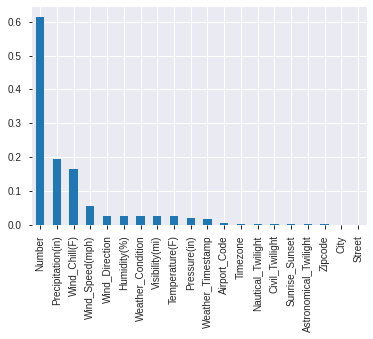

In [ ]:
missing[missing!=0].plot(kind='bar')

remove columns not using

In [ ]:
df.drop(['Number'], axis=1)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


qs
1. are there more accidents in warmer or colder regions
2. what severity accidents are more common
3. are more accidents point accidents?
4. does climate contribute?
5. how much climate affects visibility
6. which states(5 nos) has highest no. of accidents ...how about per capita(population)
7.

EDA

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

# eda of each column

columns I will analyse
1.severity
2. start time
3. end time
4. distance
5. city
6. temp
7. weather cond


# city


observations from cities and states

1. miami has highest no. of accidents and is in florida which is 2nd highest state in accidents
2. california has highest no. of accidents.
3. FL has 934 cities

***many cities data shows only single digit accidents***


**MISSING DATA OR PROBLEMATIC DATA ALERT**

In [ ]:
cities=df.City.unique()
len(cities)

11682

cities no. too much
analyse the highest accidents cities

In [ ]:
cities

array(['Dublin', 'Dayton', 'Cincinnati', ..., 'Clarksdale', 'Bridgeboro',
       'American Fork-Pleasant Grove'], dtype=object)

In [ ]:
cities_accidents= df.City.value_counts()

In [ ]:
cities_accidents

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

In [ ]:
cities_accidents[:100]

Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
                ...  
Norwalk          3950
Birmingham       3925
Fremont          3924
Fairfax          3898
Colton           3824
Name: City, Length: 100, dtype: int64

trying to get population data

In [ ]:
#us_pop= pd.read_csv('../input/us-population/us populationcsvData.csv')

In [ ]:
#us_pop

In [ ]:
#dictr={}
for i in range(len(us_pop)):
    dictr[us_pop[i]]=us_pop.pop2022[i]
    #dictr.replace('dictr[i]', 'us_pop.name[i]')
print(dictr)


In [ ]:
#df2=df.loc[us_pop['name'] == 'New York City', us_pop.pop2022].iloc[0]
#df.loc[df['B'] == 3, 'A'].iloc[0]

In [ ]:
us_pop_name=us_pop.name

In [ ]:
us_pop_name

In [ ]:
us_pop_name

In [ ]:
us_pop_pop2022=us_pop.pop2022

In [ ]:
us_pop_pop2022

coming back

check if value is in column

In [ ]:
'New York' in cities

True

In [ ]:
'Tampa' in cities

True

In [ ]:
'Orlando' in cities

True

In [ ]:
list(cities).index('Miami')

1709

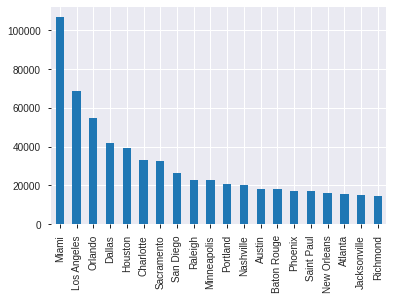

In [ ]:
cities_accidents[:20].plot(kind='bar')

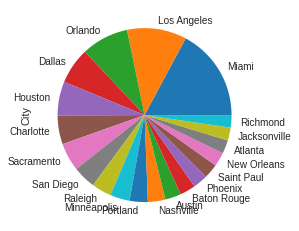

In [ ]:
cities_accidents[:20].plot(kind='pie')

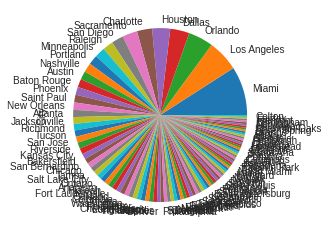

In [ ]:
cities_accidents[:100].plot(kind='pie')

histogram plot using seaborn
to know if all the top cities have high density of accidents ....how is the distribution in the cities data

In [ ]:
import seaborn as sns

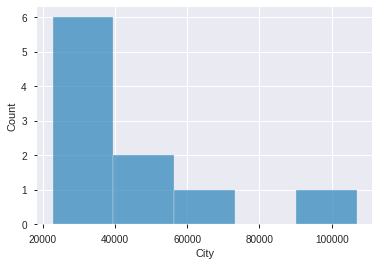

In [ ]:
sns.histplot(cities_accidents[:10])

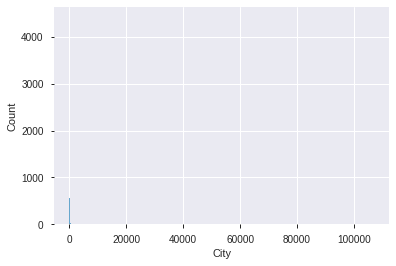

In [ ]:
sns.histplot(cities_accidents[:-10])

In [ ]:
df.State.unique()

array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX', 'MO',
       'CO', 'OK', 'LA', 'KS', 'WI', 'IA', 'MS', 'NE', 'ND', 'WY', 'SD',
       'MT', 'NM', 'AR', 'IL', 'NJ', 'GA', 'FL', 'NY', 'CT', 'RI', 'SC',
       'NC', 'MD', 'MA', 'TN', 'VA', 'DE', 'DC', 'ME', 'AL', 'NH', 'VT',
       'AZ', 'UT', 'ID', 'OR', 'WA'], dtype=object)

In [ ]:
states_c= df.State.value_counts()

In [ ]:
states_c

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
NY    108049
PA     99975
MN     97185
NC     91362
SC     89216
MD     65085
AZ     56504
NJ     52902
TN     52613
UT     49193
LA     47232
IL     47105
MI     43843
GA     40086
WA     32554
CT     29762
MO     29633
CO     25340
OH     24409
IN     20850
AL     19322
MT     15964
AR     10935
IA      9607
DC      9133
KS      9033
OK      8806
ID      8544
WI      7896
WV      7632
KY      6638
MA      6392
NV      6197
MS      5320
DE      4842
RI      4451
NH      3866
NE      3320
NM      2370
ND      2258
ME      2193
WY       990
VT       365
SD       201
Name: State, dtype: int64

In [ ]:
states_c['FL'] in df.City

True

In [ ]:
max(states_c)

795868

In [ ]:
states=states_c/len(df.State) *100

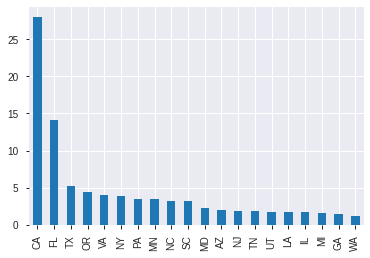

In [ ]:
\][]=\][\
        states[:20].plot(kind='bar')

1. top ten cities in accidents = which state they belong
   
   1. miami   = ***florida***
   2. los angeles=***california***
   3. orlando= ***florida***
   4. dalas= ***texas***
   5.huosten = ***texas***
   6. charlotte= ***north carolina***
   7. sacramento= ***california***
   8. san diego= ***california***
   9. raleigh= ***north carolina***
   10. minniapollis= ***minnisota***

##start time##



Q

1. most freq time for accidents and dates and days
2. trend of accidencts yoy

In [ ]:
df.Start_Time[2]

'2016-02-08 06:15:39'

**converting to date_time type data**

In [ ]:
df.Start_Time=pd.to_datetime(df.Start_Time)

occuring at which hr of the day

In [ ]:
df.Start_Time[2].hour

6

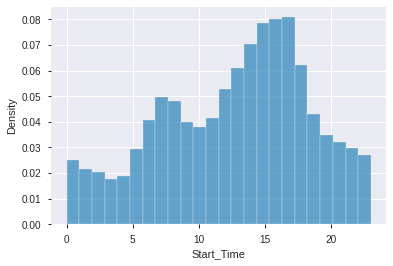

In [ ]:
sns.histplot(df.Start_Time[::].dt.hour,stat='density', bins=24)

##inferences##

1. highest no. of accidents occur between 12 hrs to 18 hrs
***highest being at 17 hrs ...which is normally the leaving hrs of office***
2. 2nd highest no. between 6 hrs to 8 hrs... most probably due to the work hrs start

**analysing for day of the week**

0= monday

6=sunday

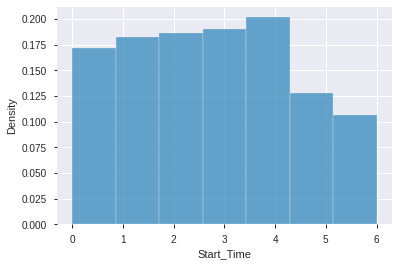

In [ ]:
sns.histplot(df.Start_Time.dt.dayofweek,stat='density', bins=7)

##on weekends no. of accidents is the least##

weak days its almost equally distributed

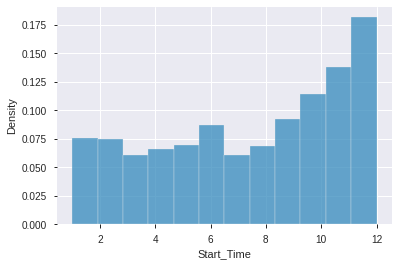

In [ ]:
sns.histplot(df.Start_Time.dt.month,stat='density', bins=12)

**why are more accidents in winter**

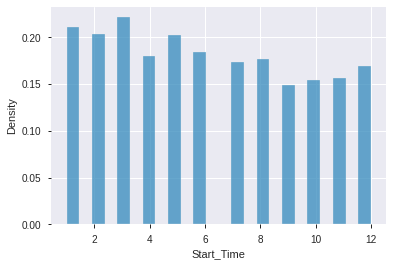

In [ ]:
year_wise=df[df.Start_Time.dt.year==2017]
sns.histplot(year_wise.Start_Time.dt.month,stat='density', bins=24)

2017 data looks well distributed

##reasons##

1. it seems data is missing for non winter months
2. source of info might have some role

In [ ]:
#year_wise=df[df.Start_Time.dt.year==2017]

#year_wise= year_wise[year_wise.Source=='Bing']
#sns.histplot(year_wise.Start_Time.dt.month,stat='density', bins=24)

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

##start latitude and longi

In [ ]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [ ]:
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

In [ ]:
import folium

In [ ]:
folium.Map(location=[38.9, -77.05], zoom_start=12)

In [ ]:
#marker
map=folium.Map()
marker=folium.Marker((df.Start_Lat[0],df.Start_Lng[0]))
marker.add_to(map)
map

In [ ]:
#for all pts
map=folium.Map()
for i in range(1000):

  marker=folium.Marker((df.Start_Lat[i],df.Start_Lng[i]))
  marker.add_to(map)
map

##heatmaps##

Definitely one of the best functions in Folium. This does not take Dataframes. You'll need to give it a list of lat, lons, i.e. a list of lists. It should be like this. NaNs will also trip it up,

[[lat, lon],[lat, lon],[lat, lon],[lat, lon],[lat, lon]]



In [ ]:
from folium import plugins
from folium.plugins import HeatMap

In [ ]:
lat = [df.Start_Lat[i].astype(float)  for i in range(1000)]
lat

In [ ]:
lng = [df.Start_Lng[i].astype(float)  for i in range(1000)]
lng

In [ ]:
map=folium.Map()
HeatMap(zip(lat,lng)).add_to(map)
map